In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = 'https://raw.githubusercontent.com/IT-Academy-BCN/Data-Science/main/Pre-processing-data/movies.dat'
movies = pd.read_table(df,sep='::', header=None, usecols=[1, 2], encoding='latin-1', engine='python')
movies.head()

,1,2
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama
4,Father of the Bride Part II (1995),Comedy


In [30]:
print("Shape:",movies.shape)
print("Nº Dimensiones:",movies.ndim)
print("Columnas",format(list(movies.columns)))
print("Data type:\n",movies.dtypes)

Shape: (3883, 2)
Nº Dimensiones: 2
Columnas [1, 2]
Data type:
 1    object
2    object
dtype: object


In [31]:
# renombro las columnas
movies.columns=["Pelicula","Genero"]
movies.head()

,Pelicula,Genero
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama
4,Father of the Bride Part II (1995),Comedy


In [32]:
# extraigo el año de la columna Pelicula y lo pongo en una nueva
import re
pattern = r"\(([1-2][0-9][0-9][0-9])\)"
movies["Año"] = movies["Pelicula"].apply(lambda x: int(re.search(pattern, x).group(1)))
pattern = r" +\(.*\)"
movies["Pelicula"] = movies["Pelicula"].apply(lambda x: re.sub(pattern, "", x))
movies.head()

,Pelicula,Genero,Año
0,Toy Story,Animation|Children's|Comedy,1995
1,Jumanji,Adventure|Children's|Fantasy,1995
2,Grumpier Old Men,Comedy|Romance,1995
3,Waiting to Exhale,Comedy|Drama,1995
4,Father of the Bride Part II,Comedy,1995


In [33]:
movies.describe()

,Año
count,3883.000000
mean,1986.066959
std,16.895690
min,1919.000000
25%,1982.000000
50%,1994.000000
75%,1997.000000
max,2000.000000


In [34]:
round(movies.describe(include='all'), 3)

,Pelicula,Genero,Año
count,3883,3883,3883.000
unique,3833,301,NaN
top,Hamlet,Drama,NaN
freq,5,843,NaN
mean,NaN,NaN,1986.067
std,NaN,NaN,16.896
min,NaN,NaN,1919.000
25%,NaN,NaN,1982.000
50%,NaN,NaN,1994.000
75%,NaN,NaN,1997.000


In [8]:
movies.isnull().sum()/len(movies)

Pelicula    0.0
Genero      0.0
Año         0.0
dtype: float64

## Una variable numerica

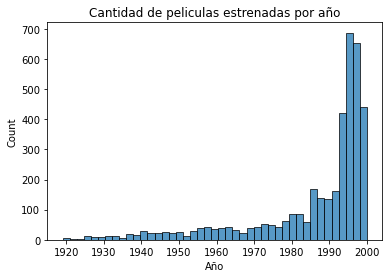

In [11]:
# visualizamos la cantidad de peliculas estrenadas por año
sns.histplot(data=movies, x="Año")
plt.title('Cantidad de peliculas estrenadas por año')
plt.show()

## Una variable numerica y otra categorica

In [13]:
# extraemos los generos
generos = []
for igenero in movies.Genero:
    for genero in igenero.split('|'):
        if genero not in generos:
            generos.append(genero)
generos

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Sci-Fi',
 'Documentary',
 'War',
 'Musical',
 'Mystery',
 'Film-Noir',
 'Western']

In [20]:
# generamos una tabla con los generos
tabla_gen = np.zeros((len(movies), len(generos)))
df = pd.DataFrame(tabla_gen, columns = generos)

# iteramos cada pelicula para que sume 1 en su genero
for i, gen in enumerate(movies.Genero):
    indices = df.columns.get_indexer(gen.split('|'))
    df.iloc[i, indices] = 1
    df = df.astype('int64')
df.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# cantidad de peliculas por genero, contando que hay alguna que tienen mas de uno
num_pelis_gen = df.sum().sort_values()
num_pelis_gen

Film-Noir        44
Western          68
Fantasy          68
Animation       105
Mystery         106
Musical         114
Documentary     127
War             143
Crime           211
Children's      251
Sci-Fi          276
Adventure       283
Horror          343
Romance         471
Thriller        492
Action          503
Comedy         1200
Drama          1603
dtype: int64

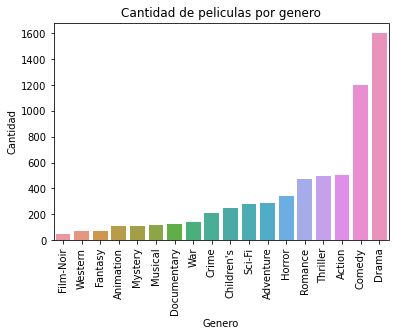

In [28]:
# visualizamos cantidad de peliculas por genero
ax = sns.barplot(x=num_pelis_gen.index,
                 y=num_pelis_gen.values)
ax.set_title("Cantidad de peliculas por genero")
ax.set_ylabel('Cantidad')
ax.set_xlabel('Genero')
plt.xticks(rotation=90)
plt.show()

## 2 Variables categoricas y 1 numerica

In [47]:
# creamos una nueva columna con las decadas
df['Decada'] = (movies['Año']//10)*10
df['Decada'] = df["Decada"].astype(str)
df.head()

TypeError: 'str' object does not support item assignment

In [41]:
movies.head()

,Pelicula,Genero,Año
0,Toy Story,Animation|Children's|Comedy,1995
1,Jumanji,Adventure|Children's|Fantasy,1995
2,Grumpier Old Men,Comedy|Romance,1995
3,Waiting to Exhale,Comedy|Drama,1995
4,Father of the Bride Part II,Comedy,1995
